# 이미지 데이터 셋을 이용한 CNN Modeling
> # Gooogle Drive Mount

## Logo_Data

- Train_Data : 498(27개의 브랜드)
- Test_Data : 177(27개의 브랜드)
<br><br>
- 데이터 사이즈가 작기 때문에 batch_size, target_size를 작게 진행
- valid data가 따로 없어서 test data로 씀


# Import Tensorflow & Keras

- import TensorFlow

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

- GPU 설정 확인

In [2]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Tue Mar 23 04:42:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

- import Keras

In [3]:
import keras
keras.__version__

'2.4.3'

# 1. Google Drive Mount

- 'Logo_Data.zip' 디렉토리를 구글드라이브에 업로드

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 마운트 결과 확인

In [5]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar  4 04:42 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


# 2. Data Processing



> ## 1) Unzip 'Logo_Data.zip'

In [6]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

In [7]:
!ls -l

total 16
drwx------  6 root root 4096 Mar 23 04:43 drive
drwxr-xr-x  1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 29 root root 4096 Mar 23 04:43 test
drwxr-xr-x 29 root root 4096 Mar 23 04:43 train


> ## 2) Image_File Driectory Setting

- train_dir
- test_dir

In [8]:
train_dir = 'train'       # train 이미지 498장은 train 디렉터리에 
test_dir = 'test'         # test 이미지 177장은 test 디렉터리에
valid_dir = 'test'        # test 이미지 177장은 test 디렉터리에

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

- Nomalization
   - ImageDataGenerator( )
- Resizing & Generator
   - flow_from_directory( )

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) # 정규화 해서 객체 지정 
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory( # 디렉터리로부터 데이터 가져오기
                  train_dir,
                  target_size = (75, 75),            # 이미지 크기 일정하게 설정
                  batch_size = 8,                    # 498장 중에서 한번에 8장씩 부르기
                  class_mode = 'categorical')        # 27개의 브랜드가 One_Hot_Encoding

valid_generator = valid_datagen.flow_from_directory( # 디렉터리로부터 데이터 가져오기
                  valid_dir,
                  target_size = (75, 75),            # 이미지 크기 일정하게 설정
                  batch_size = 8,                    # 177장 중에서 한번에 8장씩 부르기
                  class_mode = 'categorical')  
# 다중분류는 class_mode = 'categorical'

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


> ## 4) Test train_generator : generator 잘 됐는지 확인

In [11]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기 : ', data_batch.shape)  # 20장씩, 150x150x3크기의 컬러이미지
  print('배치 레이블 크기 : ', labels_batch.shape)# 20장씩 27개
  break

배치 데이터 크기 :  (8, 75, 75, 3)
배치 레이블 크기 :  (8, 27)


# 3. CNN Keras Modeling

> ## 1) Model Define

- Feature Extraction Layer : Convolution Layer 쌓기 
- Classification

In [12]:
from keras import backend as K
K.clear_session()

In [13]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (75, 75, 3))) # 3x3 크기의 filter가 32개
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) # 3x3 크기의 filter가 64개
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))  # 3x3 크기의 filter가 128개
model.add(layers.MaxPool2D((2,2)))

# DNN 
model.add(layers.Flatten())                                 # 1차원으로 피고, 
model.add(layers.Dense(units = 512, activation = 'relu'))   # 6272 *512 + 512
model.add(layers.Dense(units = 27, activation = 'softmax')) # 512 * 27 + 27 

# filters, kernel_size, pool_size 생략하고 바로 내용 씀

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

> ## 2) Model Compile

- 모델 학습방법 설정

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
# 다중분류

> ## 3) Model Fit

- 약 1분

In [17]:
%%time

hist_logo = model.fit(train_generator,         # train data는 train_generator로 
                      steps_per_epoch = 63,   # 498장을 8개씩 꺼내기로 했으니까 전부 보려면 63번 돌려야 함. 이게 한번의 epoch
                      epochs = 60,
                      validation_data = valid_generator, # valid data는 train_generator로 돌리자 
                      validation_steps = 23)  # 위 과정을 60번 반복 
                                     

Epoch 1/60
63/63 [==============================] - 1s 23ms/step - loss: 3.2362 - accuracy: 0.0643 - val_loss: 3.0637 - val_accuracy: 0.0960
Epoch 2/60
63/63 [==============================] - 1s 16ms/step - loss: 2.6757 - accuracy: 0.2410 - val_loss: 2.4546 - val_accuracy: 0.2994
Epoch 3/60
63/63 [==============================] - 1s 16ms/step - loss: 1.9214 - accuracy: 0.4478 - val_loss: 2.1213 - val_accuracy: 0.4350
Epoch 4/60
63/63 [==============================] - 1s 16ms/step - loss: 1.3171 - accuracy: 0.6486 - val_loss: 2.2037 - val_accuracy: 0.3672
Epoch 5/60
63/63 [==============================] - 1s 16ms/step - loss: 0.8063 - accuracy: 0.7631 - val_loss: 2.3833 - val_accuracy: 0.5028
Epoch 6/60
63/63 [==============================] - 1s 16ms/step - loss: 0.5881 - accuracy: 0.8353 - val_loss: 2.0400 - val_accuracy: 0.5311
Epoch 7/60
63/63 [==============================] - 1s 16ms/step - loss: 0.3226 - accuracy: 0.9056 - val_loss: 2.6236 - val_accuracy: 0.5254
Epoch 8/60
63

> ## 4) 학습 결과 시각화 

- Loss Visualization

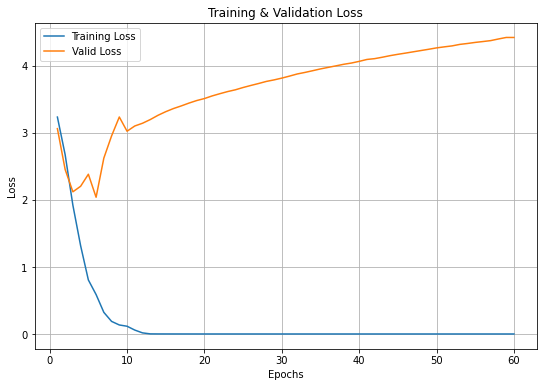

In [18]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_logo.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_logo.history['loss'])
plt.plot(epochs, hist_logo.history['val_loss'])
plt.title('Training & Validation Loss')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Valid Loss'])
plt.grid()
plt.show()

- Accuary Visualization

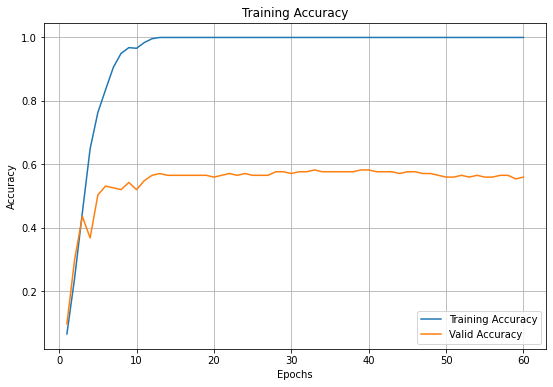

In [19]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_logo.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_logo.history['accuracy'])
plt.plot(epochs, hist_logo.history['val_accuracy'])
plt.title('Training Accuracy')
# plt.ylim(0, 0.4)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.grid()
plt.show() 

> ## 5) Model Evaluate : test data로 돌려보자

- test_generator 

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  target_size = (75, 75),
                  batch_size = 8,                     # 177장을 8장씩 꺼내보자
                  class_mode = 'categorical')

Found 177 images belonging to 27 classes.


- Loss & Accuracy

In [21]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 23)           # 전부 돌리기 위해 18번 진행
                                                      # epoch = 한번
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# test data에서 accuracy = 0.55932 나옴 (낮음)
# loss도 높은 편

23/23 [==============================] - 0s 10ms/step - loss: 4.4239 - accuracy: 0.5593
Loss = 4.42392
Accuracy = 0.55932


# 4. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [23]:
model.save('/content/drive/My Drive/Colab Notebooks/models/003_Logo_Data.h5')

In [24]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 83766
-rw------- 1 root root  4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root    34592 Mar 17 07:32 001_model_iris.h5
drwx------ 2 root root     4096 Mar 19 08:32 002_best_mnist.h6
-rw------- 1 root root 41498896 Mar 23 02:27 002_dogs_and_cats_small.h5
drwx------ 2 root root     4096 Mar 19 08:33 003_best_mnist.h7
-rw------- 1 root root 39879700 Mar 23 04:48 003_Logo_Data.h5


> ## 3) Model Load

In [25]:
from keras.models import load_model
model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/003_Logo_Data.h5')

In [28]:
loss, accuracy = model_small.evaluate(test_generator, 
                                      steps = 23)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

23/23 [==============================] - 0s 10ms/step - loss: 4.4239 - accuracy: 0.5593
Loss = 4.42392
Accuracy = 0.55932


### 
#The End
###